In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IMDBDataset/IMDB Dataset.csv')

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### Tujuan : Menebak Sentiment dari sebuah review film

### Menganalisa Data Review Film

Cari Total Char & Total Word -> apakah Panjang kata memiliki korelasi positif terhadap review positif?

In [4]:
df['total_char'] = df['review'].apply(lambda x: len(x))
df['total_word'] = df['review'].apply(lambda x: len(x.split(" ")))

In [5]:
df[['total_char', 'total_word']]

,total_char,total_word
0,1761,307
1,998,162
2,926,166
3,748,138
4,1317,230
...,...,...
49995,1008,194
49996,642,112
49997,1280,230
49998,1234,212


C:\Users\bdrex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_char', ylabel='Density'>

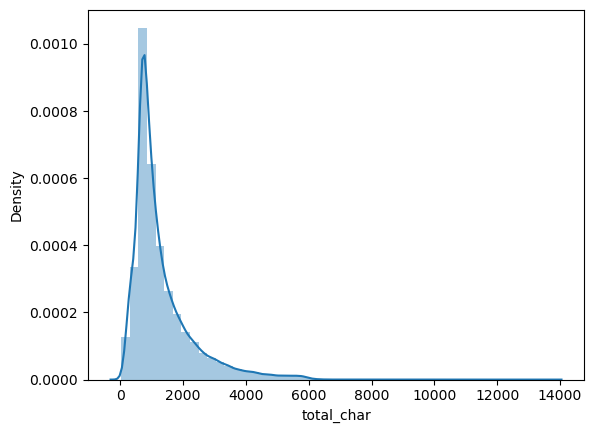

In [6]:
sns.distplot(df['total_char'])

In [7]:
print(df['total_char'].mean())
print(df['total_char'].median())

1309.43102
970.0


C:\Users\bdrex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_word', ylabel='Density'>

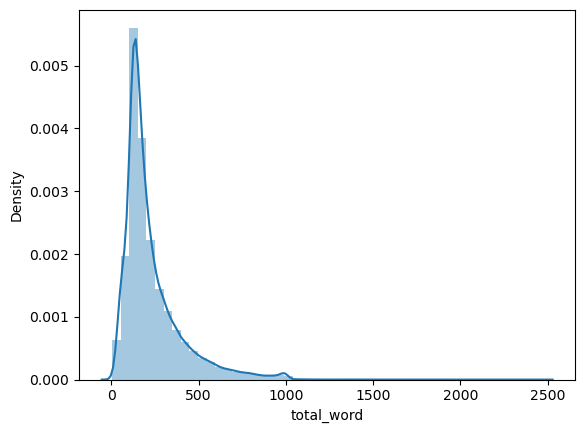

In [8]:
sns.distplot(df['total_word'])

In [9]:
print(df['total_word'].mean())
print(df['total_word'].median())

231.14594
173.0


In [10]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [11]:
df['label']  = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [12]:
df[['total_char', 'total_word','label']].corr()

,total_char,total_word,label
total_char,1.000000,0.996827,0.015526
total_word,0.996827,1.000000,0.009875
label,0.015526,0.009875,1.000000


In [13]:
q1 = np.quantile(df['total_word'], 0.25)
q3 = np.quantile(df['total_word'], 0.75)
iqr = q3-q1
upper_limit = q3 + (1.5*iqr)

In [14]:
index_to_drop = df.loc[df.total_word>=upper_limit].index

In [15]:
df = df.drop(index_to_drop)

C:\Users\bdrex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_char', ylabel='Density'>

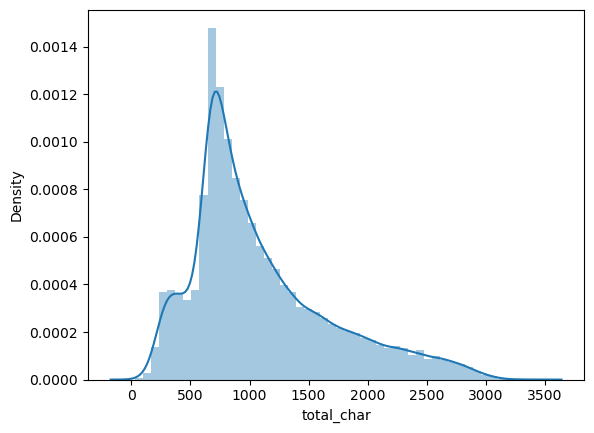

In [16]:
sns.distplot(df['total_char'])

Berapa jumlah kalimat dalam 1 buah review (definisikan 'kalimat' itu apa?)

In [17]:
# Kalimat = paragraf splitted by '.'
df['kalimat'] = df['review'].apply(lambda x: x.split("."))
df['kalimat_v2'] = df['review'].apply(lambda x: x.split(". "))

In [18]:
df['total_kalimat'] = df['kalimat_v2'].apply(lambda x: len(x))

In [19]:
df[['total_kalimat','label']].corr()

,total_kalimat,label
total_kalimat,1.000000,-0.031774
label,-0.031774,1.000000



Cari Berapa Jumlah Kata Positive/Negative dalam review tersebut

In [20]:
positive_words = []
with open('IMDBDataset/positive-words.txt', 'r') as f:
    for x in f:
        if ";" in x:
            continue
        elif len(x.strip())>0:
            positive_words.append(x.strip())

In [21]:
negative_words = []
with open('IMDBDataset/negative-words.txt', 'r') as f:
    for x in f:
        if ";" in x:
            continue
        elif len(x.strip())>0:
            negative_words.append(x.strip())

In [22]:
df['words'] = df['review'].apply(lambda x: x.split())

In [1]:
from tqdm import tqdm

In [24]:
!pip install tqdm

In [34]:
unique_words = []
for sentence in df['words']:
    for word in sentence:
        unique_words.append(word.lower())

In [37]:
unique_words = list(set(unique_words))

In [42]:
word_to_index = {}
for idx,word in enumerate(unique_words):
    word_to_index[word] = idx

In [44]:
index_to_word = {}
for word,idx in word_to_index.items():
    index_to_word[idx] = word

In [47]:
new_sentiment_words = positive_words + negative_words

In [50]:
len(word_to_index)

330191

In [51]:
for word in new_sentiment_words:
    try:
        word_to_index[word]
    except KeyError:
        word_to_index[word] = len(word_to_index)

In [54]:
index_to_word = {}
for word,idx in word_to_index.items():
    index_to_word[idx] = word

In [25]:
for row in tqdm(df['words']):
    jumlah_positive_words = 0
    jumlah_negative_words = 0
    for positive_word in positive_words:
        if positive_word in row:
            jumlah_positive_words = jumlah_positive_words + 1

    for negative_word in negative_words:
        if positive_word in row:
            jumlah_negative_words = jumlah_negative_words + 1

  0%|                                                                                        | 0/46277 [00:00<?, ?it/s]


In [59]:
new_df_words = []
for sentence in tqdm(df['words']):
    new_sentence = []
    for word in sentence:
        new_sentence.append(word_to_index.get(word.lower(), -1))
    new_df_words.append(new_sentence)

100%|█████████████████████████████████████████████████████████████████████████| 46277/46277 [00:03<00:00, 13828.34it/s]


In [61]:
new_positive_words = [word_to_index.get(word.lower(), -1) for word in positive_words]
new_negative_words = [word_to_index.get(word.lower(), -1) for word in negative_words]

In [67]:
# jumlah_positive_words_column = []
jumlah_negative_words_column = []
for row in tqdm(new_df_words):
    jumlah_positive_words = 0
    jumlah_negative_words = 0
#     for positive_word in new_positive_words:
#         if positive_word in row:
#             jumlah_positive_words = jumlah_positive_words + 1

    for negative_word in new_negative_words:
        if negative_word in row:
            jumlah_negative_words = jumlah_negative_words + 1
#     jumlah_positive_words_column.append(jumlah_positive_words)
    jumlah_negative_words_column.append(jumlah_negative_words)

100%|███████████████████████████████████████████████████████████████████████████| 46277/46277 [06:29<00:00, 118.78it/s]


In [69]:
df['jumlah_positive_words'] = jumlah_positive_words_column
df['jumlah_negative_words'] = jumlah_negative_words_column

In [71]:
df[['jumlah_positive_words','jumlah_negative_words','label']].corr()

,jumlah_positive_words,jumlah_negative_words,label
jumlah_positive_words,1.000000,0.356043,0.268308
jumlah_negative_words,0.356043,1.000000,-0.254691
label,0.268308,-0.254691,1.000000


C:\Users\bdrex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='jumlah_positive_words'>

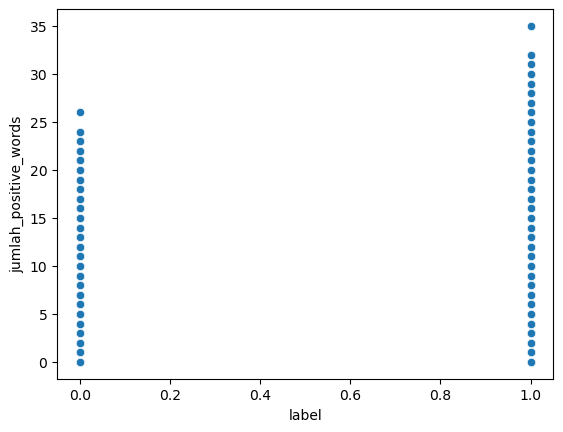

In [76]:
sns.scatterplot(df['label'], df['jumlah_positive_words'])

C:\Users\bdrex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='jumlah_negative_words'>

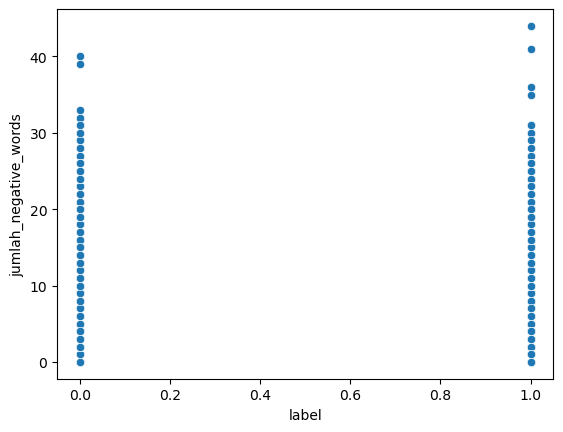

In [75]:
sns.scatterplot(df['label'], df['jumlah_negative_words'])

C:\Users\bdrex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='jumlah_negative_words', ylabel='Density'>

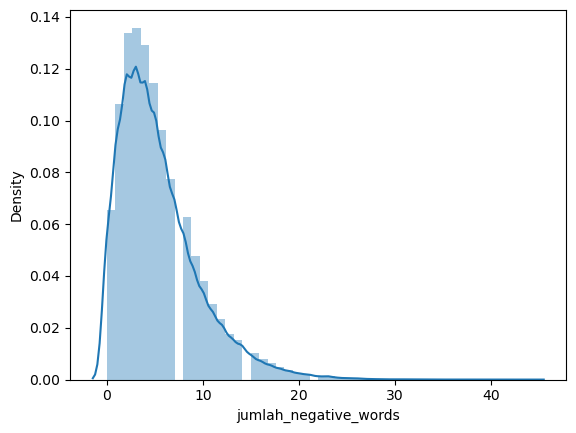

In [79]:
sns.distplot(df['jumlah_negative_words'])

C:\Users\bdrex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='jumlah_positive_words', ylabel='Density'>

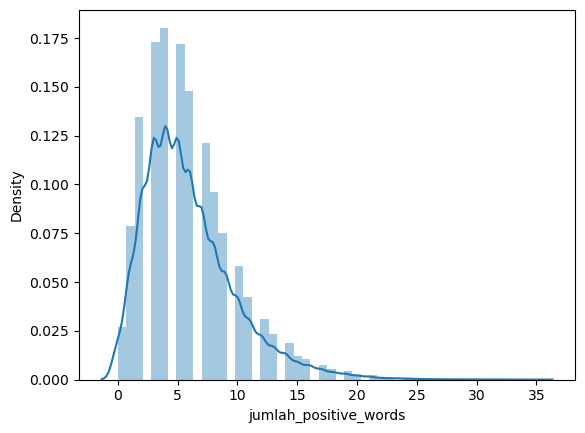

In [80]:
sns.distplot(df['jumlah_positive_words'])

In [85]:
df['jumlah_positive_words'].median()

5.0

kata negative apa yang paling sering digunakan(mungkin menjadi acuan dasar sensor kata pada review yang ada) (cari dictionary of kata negative)

In [93]:
calculate_kemunculan_negative_words = {}

for new_negative_word in tqdm(new_negative_words):
    for sentence in new_df_words:
        if new_negative_word in sentence:
            try:
                calculate_kemunculan_negative_words[new_negative_word] += 1
            except KeyError:
                calculate_kemunculan_negative_words[new_negative_word] = 1

100%|██████████████████████████████████████████████████████████████████████████████| 4783/4783 [10:09<00:00,  7.84it/s]


In [95]:
words = [word for sentence in new_df_words for word in sentence]# result: list of element dengan jumlah row = column * row awal.

In [ ]:
# [[do_something_for_element(element) for element in list_2] for list_2 in list_1] # result: list of list dengan jumlah row yang sama dengan aslinya.

In [114]:
from collections import Counter


Counter({124491: 35341,
         253690: 218835,
         251357: 490232,
         201312: 12668,
         96095: 357,
         71350: 24799,
         327696: 565,
         201358: 98865,
         320138: 10567,
         268888: 7043,
         230274: 27465,
         248940: 1078,
         210487: 97,
         248078: 1856,
         302816: 2154,
         286021: 39845,
         263664: 48,
         41773: 31142,
         251849: 44265,
         199149: 313,
         40544: 66305,
         163297: 117696,
         12608: 161161,
         73918: 1376,
         9441: 21818,
         104100: 1191,
         132977: 64044,
         292212: 322,
         184738: 78348,
         127105: 11216,
         300501: 12075,
         283533: 5728,
         130676: 193,
         82702: 12995,
         305777: 25445,
         238344: 76719,
         97095: 12039,
         262435: 72,
         216968: 244246,
         265131: 18,
         83054: 6093,
         37665: 315,
         74105: 15530,
        

In [113]:
index_to_word[251849]

'are'

In [117]:
top_10_negative = sorted(calculate_kemunculan_negative_words.items(), key=lambda x:x[1], reverse=True)[:10]
top_10_negative_two = sorted(Counter(words).items(), key=lambda x:x[1], reverse=True)

In [108]:
for x in top_10_negative:
    print(index_to_word[x[0]])

bad
plot
funny
worst
hard
poor
waste
stupid
lost
boring


In [122]:
counter = 0
for word in top_10_negative_two:
    if word[0] in new_negative_words:
        print(index_to_word[word[0]])
        counter += 1
    if counter == 10:
        break

bad
plot
funny
worst
hard
poor
waste
stupid
lost
boring


In [125]:
top_10_negative_index = [x[0] for x in top_10_negative]

In [128]:
is_have_top_10_negative_words_columns = []

for new_df_word in tqdm(new_df_words):
    is_have = False
    for negative_word in top_10_negative_index:
        if negative_word in new_df_word:
            is_have = True
            break
    is_have_top_10_negative_words_columns.append(is_have)
        

100%|█████████████████████████████████████████████████████████████████████████| 46277/46277 [00:00<00:00, 84182.30it/s]


In [133]:
df['is_have_top_10_negative_words'] = is_have_top_10_negative_words_columns

In [139]:
df[['is_have_top_10_negative_words', 'label']].corr()

,is_have_top_10_negative_words,label
is_have_top_10_negative_words,1.000000,-0.301471
label,-0.301471,1.000000


Jumlah Sentiment Terbanyak? (check label)

In [140]:
Counter(df['label'])

Counter({1: 22994, 0: 23283})

Untuk emoji bisa mempengaruhi sentiment? (harus tau emoji apa yang di mention di text ini)

In [171]:
!pip install emot

     -------------------------------------- 61.5/61.5 kB 544.9 kB/s eta 0:00:00


In [209]:
import emot

In [218]:
is_have_emoji = []
for review in tqdm(df['review']):
    is_have = False
    for emoji in emot.emo_unicode.EMOTICONS_EMO.keys():
        if emoji in review:
            is_have = True
            break
    is_have_emoji.append(is_have)

100%|█████████████████████████████████████████████████████████████████████████| 46277/46277 [00:03<00:00, 13629.65it/s]


In [220]:
df['is_have_emoji'] = is_have_emoji

In [221]:
df[['is_have_emoji', 'label']].corr()

,is_have_emoji,label
is_have_emoji,1.000000,0.004952
label,0.004952,1.000000


In [222]:
Counter(df['is_have_emoji'])

Counter({False: 44299, True: 1978})

kalau tanda baca nya ! bisa jadi negative --> (contoh: STUPID MOVIE!!!! (bisa jadi negative))

In [141]:
# import re

In [201]:
is_any_tanda_seru = []
for sentence in df['review']:
    tmp = re.findall("([!]){2,}", sentence)
    if len(tmp) > 0:
        is_any_tanda_seru.append(True)
    else:
        is_any_tanda_seru.append(False)

In [204]:
df['is_any_tanda_seru'] = is_any_tanda_seru

In [207]:
df[['is_any_tanda_seru', 'label']].corr()

,is_any_tanda_seru,label
is_any_tanda_seru,1.000000,-0.012318
label,-0.012318,1.000000


In [200]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

Kalau ada kalimat sarkasme bisa dideteksi sebagai positive atau negative -> (harus tau apa itu kalimat sarkasme)

kalau ada certain words misal stupid, dumb, sucks dll bisa dikategorikan sebagai Negative Toxic, yaitung 1 tingkat diatas negative biasa -> (level of harshness of some words)